# Dog Breeds changing files & folders

## 1. Carga datos & procesado imágenes

In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
import random
import tensorflow as tf

from skimage.io import imread
from tensorflow import keras
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Flatten, Dense, Activation, BatchNormalization

In [2]:
train_path = '/Users/cris/Repositorios/local_docs/curso_ds21/dog-breed-identification/train/'
test_path = '/Users/cris/Repositorios/local_docs/curso_ds21/dog-breed-identification/test/'
target_df = pd.read_csv('/Users/cris/Repositorios/local_docs/curso_ds21/dog-breed-identification/labels.csv')

In [10]:
import os
import shutil

srcpath = "/Users/cris/Repositorios/local_docs/curso_ds21/dog-breed-identification/train/"
destpath = "/Users/cris/Repositorios/local_docs/curso_ds21/dogs_classification/"

In [11]:
target_df

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [16]:
for name in range(len(target_df)):
    name = target_df['breed'][name]
    for file in os.listdir(srcpath):
        if file in os.listdir(destpath):
            count = 
            while file in os.listdir(destpath):
                file 
            
        file = os.rename(srcpath + file, destpath + name + '.jpg')
        break

In [ ]:
 for file in os.listdir(srcpath):
    file = os.rename(srcpath + file, destpath + target_df['breed'])



In [5]:
for root, subFolders, files in os.walk(srcpath):
    for file in files:
        file.o
        subFolder = os.path.join(destpath, file)
        if not os.path.isdir(subFolder):
            os.makedirs(subFolder)
        shutil.move(os.path.join(root, file), subFolder)

In [6]:
for root, subFolders, files in os.walk(srcpath):
    print(root)
    print(subFolders)
    print(files)
    break

/Users/cris/Repositorios/local_docs/curso_ds21/dog-breed-identification/train
[]
[]


In [9]:
for file in os.listdir(srcpath):
    print(file)
    break

84accc2dc9f5bb3ebee89fe1bf23639c.jpg


In [238]:
for i in range(len(target_df['id'])):
    target_df['id'][i] = target_df['id'][i] + '.jpg'

In [239]:
labels_target = target_df['breed'].unique()

In [240]:
labels_int = pd.DataFrame({'target':labels_target,
                           'target_int':0})

In [241]:
for i in range(len(labels_target)):
    labels_int['target_int'][i]=i

<ipython-input-241-0d4d09667d7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_int['target_int'][i]=i


In [242]:
final_target = target_df.copy()

In [243]:
final_target = final_target.merge(labels_int, left_on='breed', right_on='target')

In [244]:
target_int = final_target.copy()

In [245]:
target_int.drop(columns='target', inplace=True)

In [246]:
target_int = target_int.astype('str')

In [247]:
imagenes = []
filenames = os.listdir(train_path)[:1000]

for img in os.listdir(train_path)[:1000]:
    image = train_path + img
    img_gray = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    smallimage = cv2.resize(img_gray, (100, 100))
    smallimage = smallimage / 255.
    imagenes.append(smallimage)

#smallimage = smallimage.reshape(100, 100, 1)

In [248]:
filenames = pd.DataFrame({'archivo':filenames})

In [249]:
file = filenames.merge(target_int, left_on='archivo', right_on='id')

In [250]:
X_train = np.array(imagenes)

In [251]:
X_train = X_train.reshape(1000, 100, 100, 1)

In [252]:
X_train.shape

(1000, 100, 100, 1)

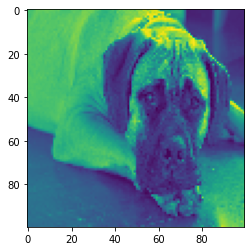

In [253]:
plt.imshow(X_train[999])

In [254]:
y_train = file['target_int']

In [255]:
y_train = np.array(y_train).astype('int')

In [256]:
y_train.shape

(1000,)

In [ ]:
y_prueba = file['target_int'].copy()

In [ ]:
y_prueba = keras.utils.to_categorical(np.asarray(y_prueba.factorize()[0]))

In [ ]:
y_prueba[1]

In [ ]:
file2 = filenames.merge(target_df, left_on='archivo', right_on='archivo')

In [ ]:
y_prueba2 = file['target_int'].copy()

In [ ]:
file2.drop(columns='archivo',inplace=True)

In [ ]:
y_prueba2 = pd.get_dummies(file2)

In [ ]:
y_prueba2.shape

In [ ]:
y_prueba2

## 2. Modelo

model.add(Conv2D(128, (4, 4), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='sigmoid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [257]:


model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',
          input_shape=X_train.shape[1:], padding='same'))
model.add(Dropout(.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(.2))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.2))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dropout(.2))

model.add(Dense(256, kernel_constraint=MaxNorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Dense(128, kernel_constraint=MaxNorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(120, activation='softmax'))

In [258]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [259]:
X_train_ = X_train[:900]
y_train_ = y_train[:900]

X_test_ = X_train[900:]
y_test_ = y_train[900:]

In [260]:
model.fit(X_train_, y_train_, validation_data=(
    X_test_, y_test_), epochs=25, batch_size=64)

Epoch 1/25
15/15 [==============================] - 18s 1s/step - loss: 5.0929 - acc: 0.0108 - val_loss: 4.7901 - val_acc: 0.0100
Epoch 2/25
15/15 [==============================] - 14s 937ms/step - loss: 5.2467 - acc: 0.0066 - val_loss: 4.8005 - val_acc: 0.0100
Epoch 3/25
15/15 [==============================] - 14s 942ms/step - loss: 4.9381 - acc: 0.0201 - val_loss: 4.8283 - val_acc: 0.0100
Epoch 4/25
15/15 [==============================] - 14s 919ms/step - loss: 4.6126 - acc: 0.0400 - val_loss: 4.7981 - val_acc: 0.0200
Epoch 5/25
15/15 [==============================] - 15s 944ms/step - loss: 4.4660 - acc: 0.0452 - val_loss: 4.8064 - val_acc: 0.0000e+00
Epoch 6/25
15/15 [==============================] - 15s 959ms/step - loss: 4.2749 - acc: 0.0839 - val_loss: 4.8105 - val_acc: 0.0000e+00
Epoch 7/25
15/15 [==============================] - 15s 936ms/step - loss: 4.1594 - acc: 0.0902 - val_loss: 4.8120 - val_acc: 0.0100
Epoch 8/25
15/15 [==============================] - 14s 935ms/st

In [208]:
model.fit(X_train, y_train, epochs=25,
          batch_size=64, validation_split=.5)

Epoch 1/25
8/8 [==============================] - 17s 2s/step - loss: 5.2604 - acc: 0.0113 - val_loss: 4.7889 - val_acc: 0.0060
Epoch 2/25
8/8 [==============================] - 13s 2s/step - loss: 5.2160 - acc: 0.0057 - val_loss: 4.7821 - val_acc: 0.0140
Epoch 3/25
8/8 [==============================] - 13s 2s/step - loss: 4.9209 - acc: 0.0299 - val_loss: 4.7850 - val_acc: 0.0040
Epoch 4/25
8/8 [==============================] - 15s 2s/step - loss: 4.5502 - acc: 0.0465 - val_loss: 4.8011 - val_acc: 0.0100
Epoch 5/25
8/8 [==============================] - 13s 2s/step - loss: 4.1216 - acc: 0.0742 - val_loss: 4.8167 - val_acc: 0.0040
Epoch 6/25
8/8 [==============================] - 13s 2s/step - loss: 4.9537 - acc: 0.0070 - val_loss: 4.8206 - val_acc: 0.0080
Epoch 7/25
8/8 [==============================] - 14s 2s/step - loss: 4.3177 - acc: 0.0881 - val_loss: 4.8219 - val_acc: 0.0040
Epoch 8/25
8/8 [==============================] - 16s 2s/step - loss: 4.0117 - acc: 0.1156 - val_loss: 4

In [261]:
# Model evaluation
scores = model.evaluate(X_test_, y_test_, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 0.00%


In [262]:
scores

[4.909978866577148, 0.0]

In [232]:
scores

[]

In [ ]:
print("Accuracy: %.2f%%" % (scores[1]*100))

## 2.2 Otro modelo

## 3. Predicción y test

In [63]:
imagenes_test = []
filenames_test = os.listdir(test_path)

for img in os.listdir(test_path):
    image = test_path + img
    img_gray = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    smallimage = cv2.resize(img_gray, (100, 100))
    smallimage = smallimage / 255.
    smallimage = smallimage.reshape(100, 100, 1)
    imagenes_test.append(smallimage)

In [64]:
X_test = np.array(imagenes_test)

In [65]:
X_test.shape

(1150, 100, 100, 1)

In [66]:
predictions = model.predict(X_test)

In [67]:
predictions.shape

(1150, 29)

## 4. Exportación sample

In [68]:
max_val = []

for i in range(len(predictions)):
    val = np.argmax(predictions[i])
    max_val.append(val)

In [69]:
true_values = []

for i in max_val:
    for v in labels_int['target_int']:
        if i == v:
            true_values.append(labels_int['target'][v])

In [70]:
df_submission = pd.DataFrame({'archivo': filenames_test,
                            'target':true_values})

In [71]:
df_submission.to_csv('submission_9.csv', index=False)